In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier   
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import datasets




In [59]:
#verificar las versiones
import sys
import sklearn
import matplotlib as plt1 


print(f"Python: {sys.version}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt1.__version__}")
print(f"Seaborn: {sns.__version__}")
import sklearn
print(f"Scikit-learn: {sklearn.__version__}")

Python: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]
NumPy: 2.2.3
Pandas: 2.2.3
Matplotlib: 3.10.0
Seaborn: 0.13.2
Scikit-learn: 1.6.1


In [60]:
#carga y exploracion de datos
iris = datasets.load_iris()

#convertir a dataframe
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

#mapeo de etiquetas numéricas
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#mostrar las primeras 5 filas
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Valores nulos en el dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


C:\Users\Alumnado\AppData\Local\Temp\ipykernel_14496\1079157696.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='viridis')


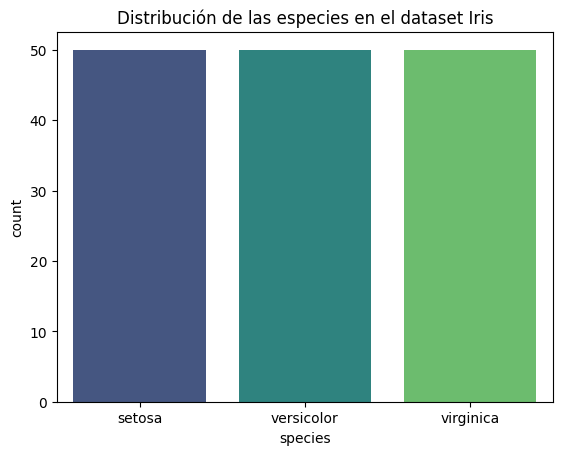

In [61]:
# Información general del dataset
df.info()

# Resumen estadístico de los datos numéricos
df.describe()

# Comprobación de valores nulos
print("Valores nulos en el dataset:\n", df.isnull().sum())

# Visualización de la distribución de las clases
sns.countplot(x='species', data=df, palette='viridis')
plt.title('Distribución de las especies en el dataset Iris')
plt.show()

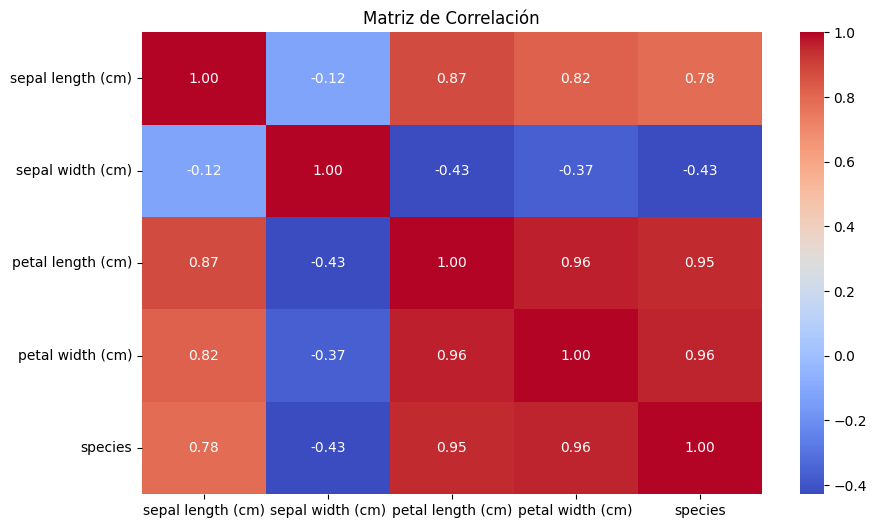

In [62]:
#Matriz de correlación

df_encoded = df.copy()
df_encoded['species'] = df_encoded['species'].astype('category').cat.codes

#matriz de correlacion
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

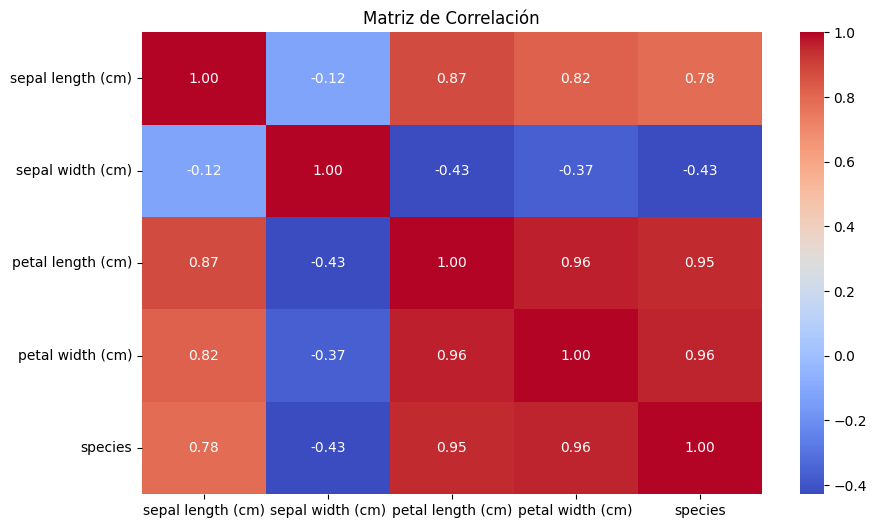

In [64]:
df_encoded = df.copy()
df_encoded['species'] = df_encoded['species'].astype('category').cat.codes
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [65]:
#Separacioon de las caracteristicas (x) y la variable objetivo (y)
X = df.drop(columns=['species'])
y = df['species']

#division en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [66]:
#Normalizacion de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Reporte de Clasificación - Random Forest:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precisión de k-Nearest Neighbors: 1.0000



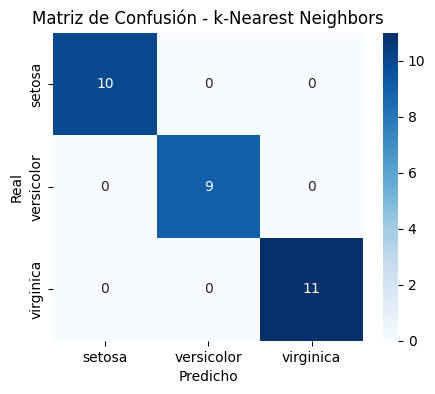

Precisión de Árbol de Decisión: 1.0000



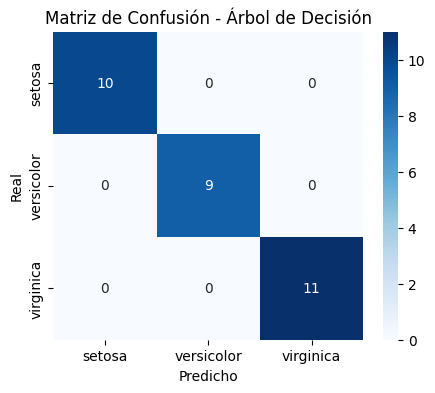

Precisión de Random Forest: 1.0000



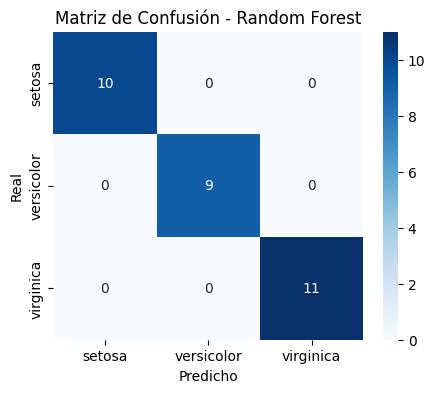

Precisión de SVM: 0.9667



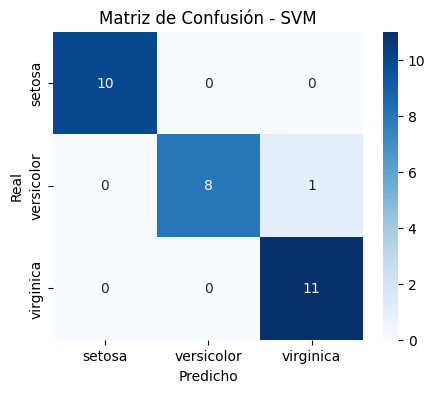

In [69]:
#Definimos una función para entrenar y evaluar cada modelo:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
# Evaluación
    acc = accuracy_score(y_test, y_pred)
    print(f"Precisión de {model_name}: {acc:.4f}\n")
# Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()
# Reporte de Clasificación
print(f"Reporte de Clasificación - {model_name}:\n",classification_report(y_test, y_pred))

# Modelos
models = {
"k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
"Árbol de Decisión": DecisionTreeClassifier(random_state=42),
"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
"SVM": SVC(kernel='linear', random_state=42)
}
# Entrenamiento y Evaluación
for name, model in models.items():
    train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test,
    name)

In [75]:
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc

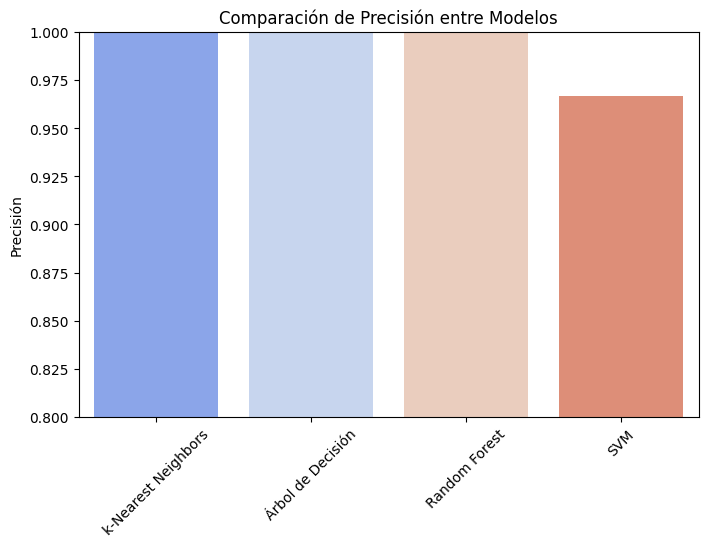

In [77]:
# #Visualización de la práctica
plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), hue = list(accuracy_results.keys()), palette='coolwarm')
plt.ylim(0.8, 1)
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre Modelos')
plt.xticks(rotation=45)
plt.show()


